# EDA PROCESS: 

### Import the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(365)
import pickle
import warnings
warnings.filterwarnings("ignore")

### Read in the cleaned datasets by boroughs and combined as one.

##### For time-series data:

In [2]:
all_df = pickle.load(open('./data/final_cleaned_data/all_cleaned_data.pkl','rb'))
bronx_df = pickle.load(open('./data/final_cleaned_data/bronx_cleaned_data.pkl','rb'))
brooklyn_df = pickle.load(open('./data/final_cleaned_data/brooklyn_cleaned_data.pkl','rb'))
manhattan_df = pickle.load(open('./data/final_cleaned_data/manhattan_cleaned_data.pkl','rb'))
queens_df = pickle.load(open('./data/final_cleaned_data/queens_cleaned_data.pkl','rb'))
staten_df = pickle.load(open('./data/final_cleaned_data/staten_cleaned_data.pkl','rb'))

##### Let's see if the data looks correct in terms of our pick up times ranging from June 01 2019 to June 30 2020

In [3]:
all_df

,count
pickup_time,
2019-06-01 00:00:00,11815
2019-06-01 01:00:00,9121
2019-06-01 02:00:00,6608
2019-06-01 03:00:00,4591
2019-06-01 04:00:00,3197
...,...
2020-06-30 19:00:00,1189
2020-06-30 20:00:00,797
2020-06-30 21:00:00,631


### Showing Hourly Number of Pickups in all of NYC.

In [4]:
all_hourly = all_df[['count']].pivot_table(index=all_df.index.date, columns=all_df.index.hour).fillna(0)

brooklyn_hourly = brooklyn_df[['count']].pivot_table(index=brooklyn_df.index.date, columns=brooklyn_df.index.hour).fillna(0)
manhattan_hourly = manhattan_df[['count']].pivot_table(index=manhattan_df.index.date, columns=manhattan_df.index.hour).fillna(0)
bronx_hourly = bronx_df[['count']].pivot_table(index=bronx_df.index.date, columns=bronx_df.index.hour).fillna(0)
staten_hourly = staten_df[['count']].pivot_table(index=staten_df.index.date, columns=staten_df.index.hour).fillna(0)
queens_hourly = queens_df[['count']].pivot_table(index=queens_df.index.date, columns=queens_df.index.hour).fillna(0)

manhattan_hourly

count                                                           \
pickup_time     0     1     2     3     4     5     6      7      8      9    
2019-06-01   10744  8371  6212  4319  2921  1515  2142   3797   5953   8583   
2019-06-02   11117  8981  6815  4868  2999  1504  1732   3041   4443   6395   
2019-06-03    2858  1787  1118   779   998  1948  5442   9578  11303  10342   
2019-06-04    3853  1952  1219   756   964  1976  5297   8482   9806   9812   
2019-06-05    4749  2534  1560  1019  1004  2016  5795  10444  12702  11776   
...            ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
2020-06-26     271   179   133   102   118   215   599    807   1095   1151   
2020-06-27     466   320   229   147   127   113   258    344    458    648   
2020-06-28     420   298   227   127   105   106   206    262    333    412   
2020-06-29     243   161   128    91   106   195   637    859   1134   1259   
2020-06-30     186   138    94    78   109   175   584    861   1162   1321   

             ...                                                          \
pickup_time  ...     14     15     16     17     18     19     20     21   
2019-06-01   ...  12864  12060  11668  13011  13453  12797  10388  10799   
2019-06-02   ...  10823  10467  11037  12909  10174   9171   7870   8981   
2019-06-03   ...  11261  11781  11137  12747  14114  12926  11428  12294   
2019-06-04   ...  11580  12021  11368  12942  14702  13889  12191  12135   
2019-06-05   ...  12799  13051  11400  13173  15488  14916  13738  14258   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-06-26   ...   1685   1718   1636   1708   1604   1326    911    746   
2020-06-27   ...   1253   1186    940    922    878    794    630    562   
2020-06-28   ...    938   1034    988    891   1051    878    582    483   
2020-06-29   ...   1653   1630   1684   1671   1808   1123    661    517   
2020-06-30   ...   1607   1644   1587   1604   1512   1130    730    553   

                           
pickup_time     22     23  
2019-06-01   12534  13090  
2019-06-02    8526   5032  
2019-06-03   10458   6563  
2019-06-04   10683   8163  
2019-06-05   12898   9080  
...            ...    ...  
2020-06-26     680    641  
2020-06-27     551    591  
2020-06-28     448    318  
2020-06-29     419    310  
2020-06-30     466    354  

[396 rows x 24 columns]

## Visualizations

### Boroughs Distribution

Let's see which boroughs are most populated vs not and see how they are distributed.

In [5]:
# import all_data
all_data = pickle.load(open('./data/final_cleaned_data/all_not_ts.pkl','rb'))
all_data = all_data[all_data['Borough'] != 'nan']
print(len(all_data))
all_data.Borough.value_counts()


63199506


Manhattan        57815608
Queens            4452427
Brooklyn           778689
Bronx              148908
Staten Island        3874
Name: Borough, dtype: int64

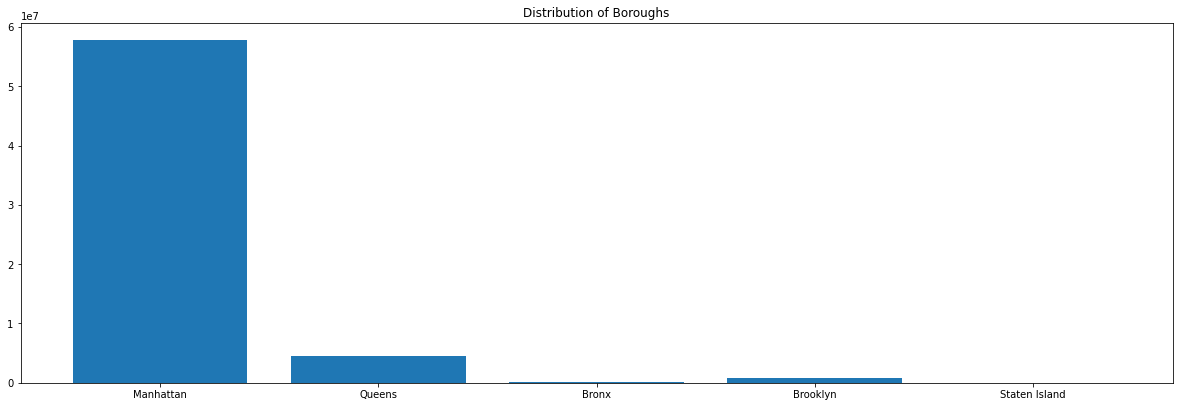

In [6]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_axes([0,0,1,1])
x = all_data['Borough'].unique()
y = [len(all_data[all_data['Borough'] == 'Manhattan']), len(all_data[all_data['Borough'] == 'Queens']), len(all_data[all_data['Borough'] == 'Bronx']), len(all_data[all_data['Borough'] == 'Brooklyn']), len(all_data[all_data['Borough'] == 'Staten Island'])]
plt.title('Distribution of Boroughs')
ax.bar(x,y);

In the beginning, I was surprised at how much more pickups are located in Manhattan than any other boroughs. But this made sense as the dataset consists of only yellow cabs. If I had included green cabs dataset, I would get more diverse boroughs as their pick up location. For this reason is why I will make separate models for each borough later in modeling process

Let's plot out all of NYC to see year distribution for number of pickups in NYC

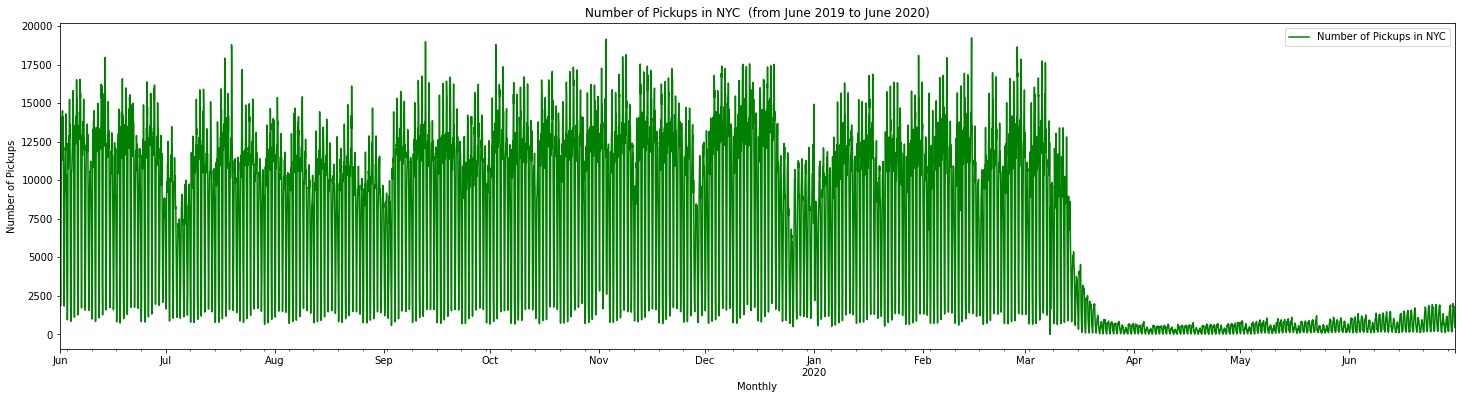

In [7]:
fig, ax = plt.subplots(figsize = (25,6))
all_df.plot(ax=ax, color='g')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in NYC'])
plt.title('Number of Pickups in NYC  (from June 2019 to June 2020)');

#### We can see that there was a sharp decline in demand for yellow cabs in NYC after March. This is when Corona Virus started becoming an issue and the NYC had a first confirmed case of COVID in March 1st 2020. 

#### Manhattan Distribution

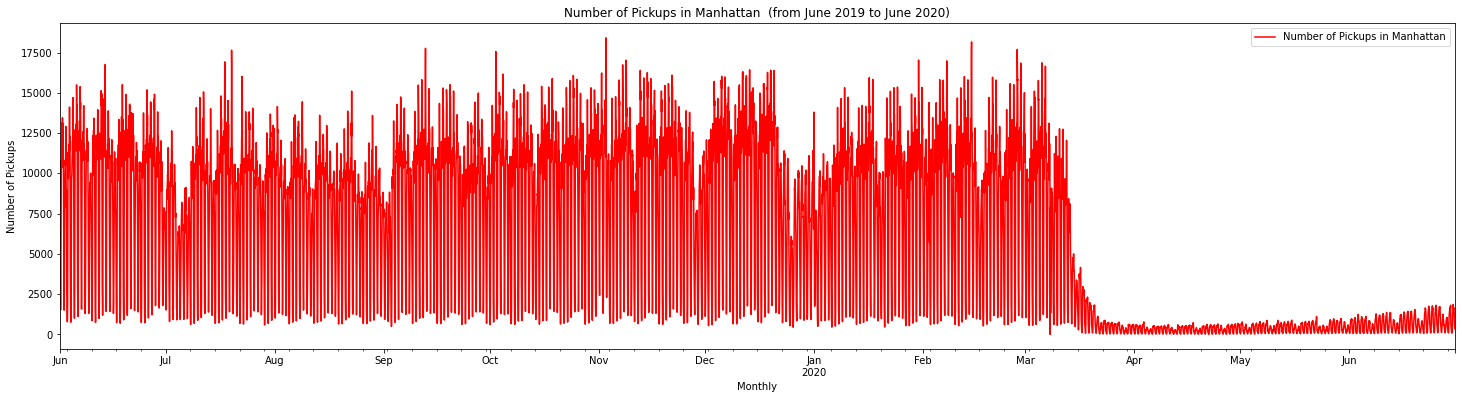

In [8]:
fig, ax = plt.subplots(figsize = (25,6))
manhattan_df.plot(ax=ax, color='r')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in Manhattan'])
plt.title('Number of Pickups in Manhattan  (from June 2019 to June 2020)');

#### Brooklyn Distribution

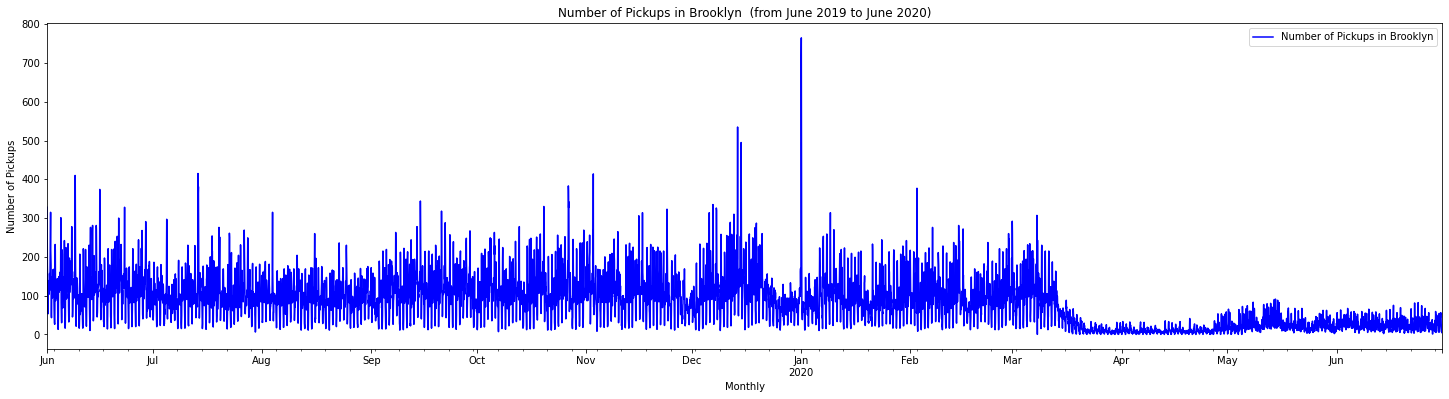

In [9]:
fig, ax = plt.subplots(figsize = (25,6))
brooklyn_df.plot(ax=ax, color='b')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in Brooklyn'])
plt.title('Number of Pickups in Brooklyn  (from June 2019 to June 2020)');

Few things to note for Brooklyn vs Manhattan for yellow cab pickup is that Brooklyn has alot less number of pickups in the area. This is probably due to yellow cabs in Manhattan being strictly for Manhattan Area. The other is to note on January 1st is when the number of pickups is highest. Clearly, COVID is hurting the yellow cab drivers. But for January first, Brooklyn has alot of New Years event such as clubs and bars so there might be a high number of pickups that day

### Queens Distribution

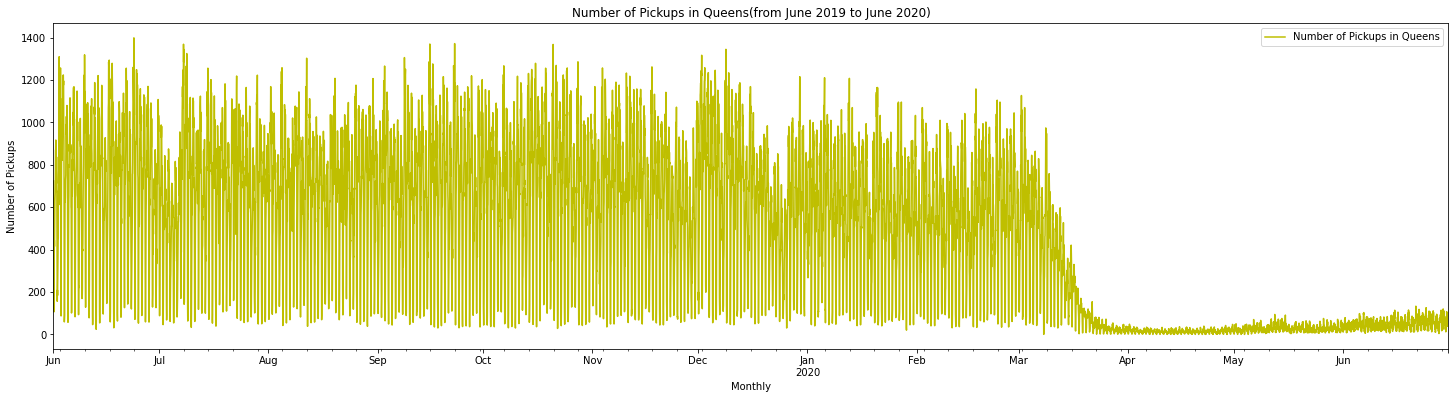

In [10]:
fig, ax = plt.subplots(figsize = (25,6))
queens_df.plot(ax=ax, color='y')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in Queens'])
plt.title('Number of Pickups in Queens(from June 2019 to June 2020)');

### Bronx Distribution

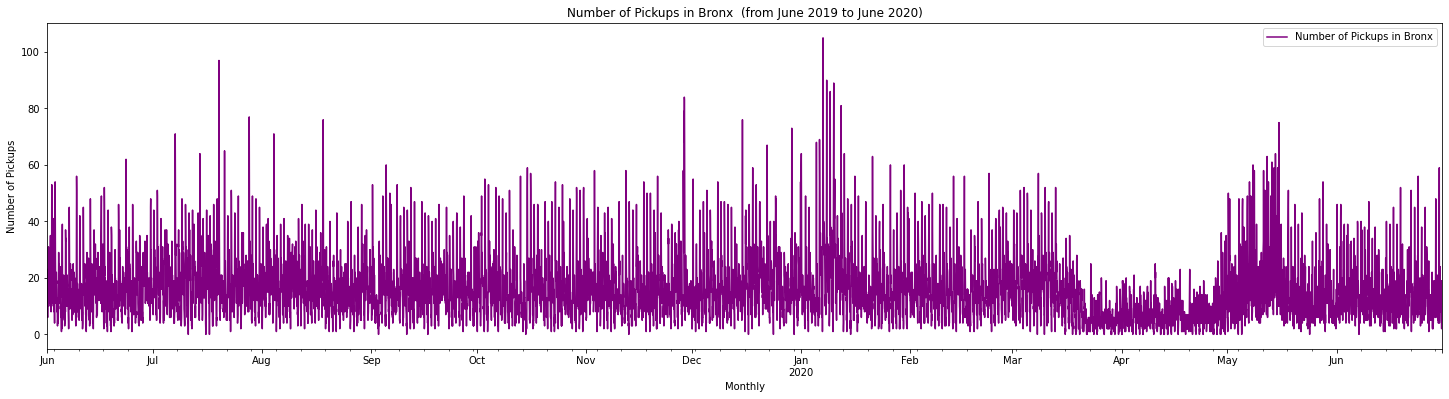

In [11]:
fig, ax = plt.subplots(figsize = (25,6))
bronx_df.plot(ax=ax, color='purple')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in Bronx'])
plt.title('Number of Pickups in Bronx  (from June 2019 to June 2020)');

### Staten Distribution

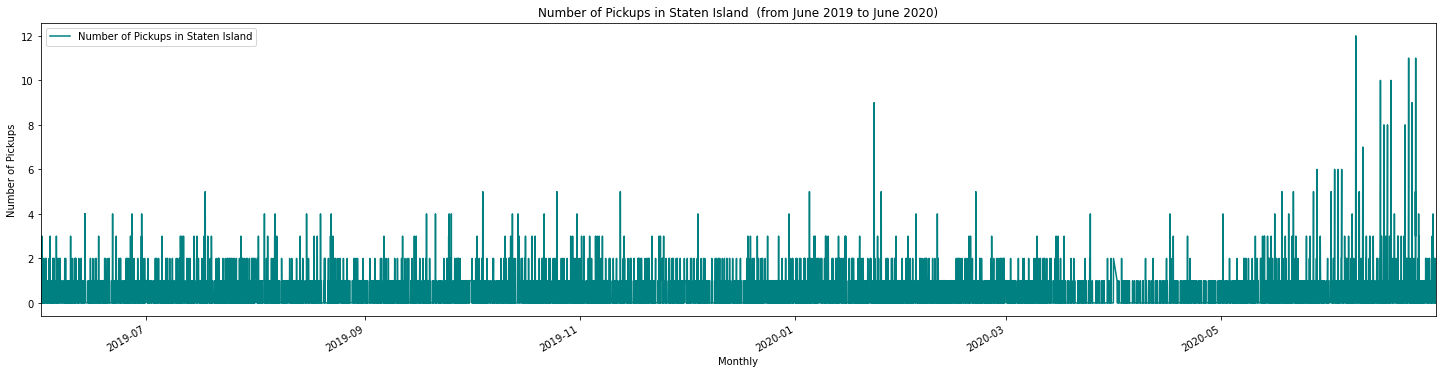

In [12]:
fig, ax = plt.subplots(figsize = (25,6))
staten_df.plot(ax=ax, color='teal')
plt.xlabel('Monthly')
plt.ylabel('Number of Pickups')
plt.legend(['Number of Pickups in Staten Island'])
plt.title('Number of Pickups in Staten Island  (from June 2019 to June 2020)');

There are not alot of pickups in Staten Island overall but one thing to note is that it starts to increase after May of 2020. 

## Weekly Distribution

Now, let's see how it looks if we were to choose a random month to see weekly plot! We will choose January of 2020 to see the plot in Manhattan.

In [13]:
man_jan_df = pickle.load(open('./data/boroughs_df/manhattan_2020_01.pkl','rb'))
# jan_df.drop(columns=['Unnamed: 0'], inplace=True)
man_jan_df


,count
pickup_time,
2020-01-01 00:00:00,12498
2020-01-01 01:00:00,13796
2020-01-01 02:00:00,12170
2020-01-01 03:00:00,8920
2020-01-01 04:00:00,5571
...,...
2020-01-31 19:00:00,14099
2020-01-31 20:00:00,12407
2020-01-31 21:00:00,12781


In [14]:
jan_first_week = man_jan_df.iloc[:168].reset_index(drop=True)
jan_second_week = man_jan_df.iloc[168:336].reset_index(drop=True)
jan_third_week = man_jan_df.iloc[336:504].reset_index(drop=True)
jan_fourth_week = man_jan_df.iloc[504:672].reset_index(drop=True)
jan_fifth_week = man_jan_df.iloc[672:].reset_index(drop=True)

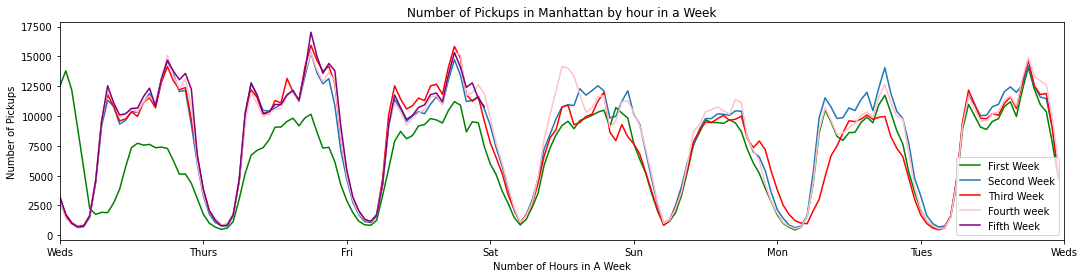

In [15]:
fig, ax = plt.subplots(figsize = (18,4))
jan_first_week.plot(ax=ax, color='g', label='First Week')
jan_second_week.plot(ax=ax)
jan_third_week.plot(ax=ax, color='r')
jan_fourth_week.plot(ax=ax, color='pink')
jan_fifth_week.plot(ax=ax, color='purple')
plt.xlabel('Number of Hours in A Week')
plt.ylabel('Number of Pickups')
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['Weds', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Weds'],)
plt.legend(['First Week', 'Second Week', 'Third Week', 'Fourth week', 'Fifth Week'])
plt.title('Number of Pickups in Manhattan by hour in a Week');

We can see here that every day of the week seems very simliar except for the first week of January which is the green line. But it does get to similiar as other weeks as days go by possibly because January 1st is the New Year and companies are off during holiday season.

#### Distribution of time in the day


Let's what time during the week will be the hot time for cab pick up. Here I will use the Weds of third week in January as an example

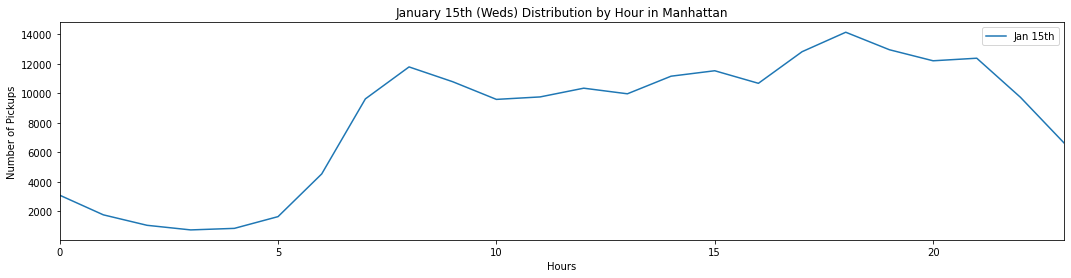

In [16]:
fig, ax = plt.subplots(figsize = (18,4))
jan_third_week.iloc[:24].plot(ax=ax);
plt.legend(['Jan 15th'])
plt.xlabel('Hours')
plt.ylabel('Number of Pickups')
plt.title('January 15th (Weds) Distribution by Hour in Manhattan');

In [17]:
jan_third_week[:24]['count'].max()

14151

In [18]:
jan_third_week[jan_third_week['count'].eq(14151)]

,count
18,14151


We can see from our visualization that at hour 18 is when the pickups are around 15107 which is at 6PM. This is due to people probably ending work and going home. Also, can see that starting around 5-8AM is when the number of pickups increase and stay around that number until the pickup so we know that taxi drivers are most needed from 7AM to 10PM.

### AFTER LOCKDOWN (COVID):  MANHATTAN

I also wanted to show what weekly and daily trend look like in terms of post covid. So I chose the month of April to display weekly distributions

In [19]:
# Load April data in Manhattan
man_april_df = pickle.load(open('./data/boroughs_df/manhattan_2020_04.pkl','rb'))
man_april_df

,count
pickup_time,
2020-04-01 00:00:00,128
2020-04-01 01:00:00,57
2020-04-01 02:00:00,29
2020-04-01 03:00:00,28
2020-04-01 04:00:00,35
...,...
2020-04-30 19:00:00,397
2020-04-30 20:00:00,319
2020-04-30 21:00:00,191


In [20]:
april_first_week = man_april_df.iloc[:168].reset_index(drop=True)
april_second_week = man_april_df.iloc[168:336].reset_index(drop=True)
april_third_week = man_april_df.iloc[336:504].reset_index(drop=True)
april_fourth_week = man_april_df.iloc[504:672].reset_index(drop=True)
april_fifth_week = man_april_df.iloc[672:].reset_index(drop=True)

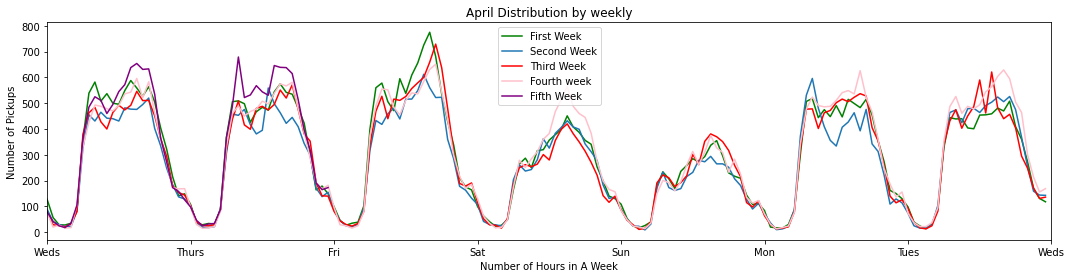

In [21]:
fig, ax = plt.subplots(figsize = (18,4))
april_first_week.plot(ax=ax, color='g', label='First Week')
april_second_week.plot(ax=ax)
april_third_week.plot(ax=ax, color='r')
april_fourth_week.plot(ax=ax, color='pink')
april_fifth_week.plot(ax=ax, color='purple')
plt.xlabel('Number of Hours in A Week')
plt.ylabel('Number of Pickups')
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168], ['Weds', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Weds'],)
plt.legend(['First Week', 'Second Week', 'Third Week', 'Fourth week', 'Fifth Week'])
plt.title('April Distribution by weekly');

There is no really big abnormalities as the trend seem to be similar throughout the week of April in terms of number of rides. Let's see if we can see how the distribution look for First week of April on Friday.

Now that we have seen the trend for April and noticed the third day on first week of April had highest peak. So I decided to take a look to see if I can decipher why that day has the highest peak.

In [22]:
man_april_df.iloc[48:72]

,count
pickup_time,
2020-04-03 00:00:00,99
2020-04-03 01:00:00,46
2020-04-03 02:00:00,27
2020-04-03 03:00:00,35
2020-04-03 04:00:00,39
2020-04-03 05:00:00,103
2020-04-03 06:00:00,399
2020-04-03 07:00:00,560
2020-04-03 08:00:00,578


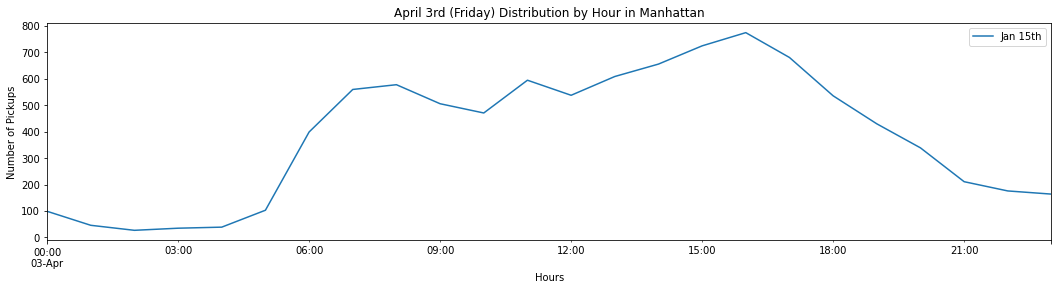

In [23]:
fig, ax = plt.subplots(figsize = (18,4))
man_april_df.iloc[48:72].plot(ax=ax);
plt.legend(['Jan 15th'])
plt.xlabel('Hours')
plt.ylabel('Number of Pickups')
plt.title('April 3rd (Friday) Distribution by Hour in Manhattan');

Since April 3rd had the highest number of rides, I wanted to take a look and see what the distribution looks like and see if we can determine on the reason why. It seems like there were alot of pickups around 3-4PM. After checking the weather, I found that it was not raining because initially I thought it could have rained that day. It was cloudy. It is possible that  I looked online to see if April 3rd is significant in any ways. Seems like on March 28th, NY has surpassed 1000 corona virus related deaths it could be that people were afraid of taking public transportation such as MTA and decided to take more cab rides. But there was no significant abnormalities that jumped out. 